In [25]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import hvplot.pandas
pd.set_option('display.max_columns', None)

In [26]:
# Import dataframes
test_df = pd.read_csv(Path('Resources/2020_week16.csv'))
train_df = pd.read_csv(Path('Resources/2020_weeks2_15.csv'))

In [27]:
display(test_df.head())
display(train_df.head())

,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif
0,Minnesota Vikings,min,New Orleans Saints,nor,16,-0.285714,1.142857,-0.500000,0.500000,7.428571,-1.928571,-2.357143,0.285714,10.285714,-1.071429,-2.642857,0.071429,-0.428571,15.928571,-107.285714,0.500000,23.357143,0.571429,-24.357143,2.857143,-0.116541,-0.021860,0,-178.963705
1,Tampa Bay Buccaneers,tam,Detroit Lions,det,16,0.285714,-0.785714,0.000000,0.000000,3.928571,1.642857,1.428571,0.571429,-4.714286,-0.285714,4.714286,-0.642857,-0.071429,1.214286,9.928571,-1.285714,5.142857,-0.071429,-4.642857,-8.642857,0.083333,0.004993,1,238.516153
2,San Francisco 49ers,sfo,Arizona Cardinals,crd,16,-0.214286,-2.500000,-0.071429,0.428571,7.142857,0.928571,-0.285714,-0.357143,14.428571,-1.714286,-4.142857,-3.642857,-0.214286,-35.214286,135.000000,0.785714,-28.071429,0.785714,-9.357143,7.285714,-0.327068,-0.019235,1,-58.793097
3,Miami Dolphins,mia,Las Vegas Raiders,rai,16,0.142857,-1.000000,-0.428571,0.142857,-31.785714,-1.000000,-1.142857,-0.285714,-29.142857,-0.928571,-1.785714,-1.928571,-0.285714,-15.571429,-37.000000,0.571429,-47.357143,-0.357143,-11.857143,2.642857,0.068627,-0.086804,1,101.109481
4,New York Giants,nyg,Baltimore Ravens,rav,16,-0.285714,-1.928571,-0.428571,0.000000,11.785714,6.428571,3.642857,-0.928571,17.142857,-1.285714,-11.357143,-7.285714,-0.642857,-59.214286,-91.857143,0.714286,-47.428571,0.285714,-20.928571,5.357143,0.037152,-0.065835,0,-255.776182


,away_name,away_abbr,home_name,home_abbr,week,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif
0,Cincinnati Bengals,cin,Cleveland Browns,cle,2,0.0,-1.0,-1.0,0.0,5.0,-3.0,2.0,-1.0,4.0,-1.0,7.0,1.0,1.0,-16.0,-12.0,1.0,-11.0,-1.0,-36.0,-1.0,0.000000,0.178571,0,-59.457910
1,Minnesota Vikings,min,Indianapolis Colts,clt,2,0.0,-2.0,0.0,-1.0,-109.0,-21.0,-17.0,1.0,-104.0,0.0,14.0,0.0,1.0,46.0,-879.0,1.0,-63.0,-1.0,-60.0,5.0,-0.333333,0.166667,0,80.630236
2,New York Giants,nyg,Chicago Bears,chi,2,-1.0,-6.0,-1.0,2.0,48.0,5.0,6.0,-1.0,37.0,-2.0,-11.0,-8.0,0.0,-120.0,-49.0,2.0,-72.0,2.0,-23.0,-11.0,0.500000,0.351515,0,-166.404690
3,Carolina Panthers,car,Tampa Bay Buccaneers,tam,2,0.0,-1.0,-2.0,-2.0,35.0,-2.0,-1.0,-1.0,30.0,-4.0,7.0,4.0,1.0,43.0,11.0,-2.0,78.0,-3.0,-38.0,-5.0,-0.500000,0.153846,0,-87.215651
4,Denver Broncos,den,Pittsburgh Steelers,pit,2,-1.0,0.0,1.0,0.0,8.0,1.0,1.0,-2.0,-13.0,2.0,-12.0,-4.0,1.0,-34.0,-264.0,-2.0,-26.0,0.0,35.0,-21.0,-1.000000,-0.200000,0,-45.328094


In [32]:
# Drop non-numerical columns
train_df = train_df.drop(columns=['away_name','away_abbr','home_name','home_abbr','week'])
test_df = test_df.drop(columns=['away_name','away_abbr','home_name','home_abbr','week'])
display(test_df.head())
display(train_df.head())

,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif
0,-0.285714,1.142857,-0.500000,0.500000,7.428571,-1.928571,-2.357143,0.285714,10.285714,-1.071429,-2.642857,0.071429,-0.428571,15.928571,-107.285714,0.500000,23.357143,0.571429,-24.357143,2.857143,-0.116541,-0.021860,0,-178.963705
1,0.285714,-0.785714,0.000000,0.000000,3.928571,1.642857,1.428571,0.571429,-4.714286,-0.285714,4.714286,-0.642857,-0.071429,1.214286,9.928571,-1.285714,5.142857,-0.071429,-4.642857,-8.642857,0.083333,0.004993,1,238.516153
2,-0.214286,-2.500000,-0.071429,0.428571,7.142857,0.928571,-0.285714,-0.357143,14.428571,-1.714286,-4.142857,-3.642857,-0.214286,-35.214286,135.000000,0.785714,-28.071429,0.785714,-9.357143,7.285714,-0.327068,-0.019235,1,-58.793097
3,0.142857,-1.000000,-0.428571,0.142857,-31.785714,-1.000000,-1.142857,-0.285714,-29.142857,-0.928571,-1.785714,-1.928571,-0.285714,-15.571429,-37.000000,0.571429,-47.357143,-0.357143,-11.857143,2.642857,0.068627,-0.086804,1,101.109481
4,-0.285714,-1.928571,-0.428571,0.000000,11.785714,6.428571,3.642857,-0.928571,17.142857,-1.285714,-11.357143,-7.285714,-0.642857,-59.214286,-91.857143,0.714286,-47.428571,0.285714,-20.928571,5.357143,0.037152,-0.065835,0,-255.776182


,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,result,elo_dif
0,0.0,-1.0,-1.0,0.0,5.0,-3.0,2.0,-1.0,4.0,-1.0,7.0,1.0,1.0,-16.0,-12.0,1.0,-11.0,-1.0,-36.0,-1.0,0.000000,0.178571,0,-59.457910
1,0.0,-2.0,0.0,-1.0,-109.0,-21.0,-17.0,1.0,-104.0,0.0,14.0,0.0,1.0,46.0,-879.0,1.0,-63.0,-1.0,-60.0,5.0,-0.333333,0.166667,0,80.630236
2,-1.0,-6.0,-1.0,2.0,48.0,5.0,6.0,-1.0,37.0,-2.0,-11.0,-8.0,0.0,-120.0,-49.0,2.0,-72.0,2.0,-23.0,-11.0,0.500000,0.351515,0,-166.404690
3,0.0,-1.0,-2.0,-2.0,35.0,-2.0,-1.0,-1.0,30.0,-4.0,7.0,4.0,1.0,43.0,11.0,-2.0,78.0,-3.0,-38.0,-5.0,-0.500000,0.153846,0,-87.215651
4,-1.0,0.0,1.0,0.0,8.0,1.0,1.0,-2.0,-13.0,2.0,-12.0,-4.0,1.0,-34.0,-264.0,-2.0,-26.0,0.0,35.0,-21.0,-1.000000,-0.200000,0,-45.328094


In [38]:
# Separate Features from labels.
X_train = train_df.drop(columns='result')
y_train = train_df['result']
X_test = test_df.drop(columns='result')
y_test = test_df['result']

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())
X_train.shape

,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,elo_dif
0,0.0,-1.0,-1.0,0.0,5.0,-3.0,2.0,-1.0,4.0,-1.0,7.0,1.0,1.0,-16.0,-12.0,1.0,-11.0,-1.0,-36.0,-1.0,0.000000,0.178571,-59.457910
1,0.0,-2.0,0.0,-1.0,-109.0,-21.0,-17.0,1.0,-104.0,0.0,14.0,0.0,1.0,46.0,-879.0,1.0,-63.0,-1.0,-60.0,5.0,-0.333333,0.166667,80.630236
2,-1.0,-6.0,-1.0,2.0,48.0,5.0,6.0,-1.0,37.0,-2.0,-11.0,-8.0,0.0,-120.0,-49.0,2.0,-72.0,2.0,-23.0,-11.0,0.500000,0.351515,-166.404690
3,0.0,-1.0,-2.0,-2.0,35.0,-2.0,-1.0,-1.0,30.0,-4.0,7.0,4.0,1.0,43.0,11.0,-2.0,78.0,-3.0,-38.0,-5.0,-0.500000,0.153846,-87.215651
4,-1.0,0.0,1.0,0.0,8.0,1.0,1.0,-2.0,-13.0,2.0,-12.0,-4.0,1.0,-34.0,-264.0,-2.0,-26.0,0.0,35.0,-21.0,-1.000000,-0.200000,-45.328094


0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

,win_perc_dif,first_downs_dif,fumbles_dif,interceptions_dif,net_pass_yards_dif,pass_attempts_dif,pass_completions_dif,pass_touchdowns_dif,pass_yards_dif,penalties_dif,points_dif,rush_attempts_dif,rush_touchdowns_dif,rush_yards_dif,time_of_possession_dif,times_sacked_dif,total_yards_dif,turnovers_dif,yards_from_penalties_dif,yards_lost_from_sacks_dif,fourth_down_perc_dif,third_down_perc_dif,elo_dif
0,-0.285714,1.142857,-0.500000,0.500000,7.428571,-1.928571,-2.357143,0.285714,10.285714,-1.071429,-2.642857,0.071429,-0.428571,15.928571,-107.285714,0.500000,23.357143,0.571429,-24.357143,2.857143,-0.116541,-0.021860,-178.963705
1,0.285714,-0.785714,0.000000,0.000000,3.928571,1.642857,1.428571,0.571429,-4.714286,-0.285714,4.714286,-0.642857,-0.071429,1.214286,9.928571,-1.285714,5.142857,-0.071429,-4.642857,-8.642857,0.083333,0.004993,238.516153
2,-0.214286,-2.500000,-0.071429,0.428571,7.142857,0.928571,-0.285714,-0.357143,14.428571,-1.714286,-4.142857,-3.642857,-0.214286,-35.214286,135.000000,0.785714,-28.071429,0.785714,-9.357143,7.285714,-0.327068,-0.019235,-58.793097
3,0.142857,-1.000000,-0.428571,0.142857,-31.785714,-1.000000,-1.142857,-0.285714,-29.142857,-0.928571,-1.785714,-1.928571,-0.285714,-15.571429,-37.000000,0.571429,-47.357143,-0.357143,-11.857143,2.642857,0.068627,-0.086804,101.109481
4,-0.285714,-1.928571,-0.428571,0.000000,11.785714,6.428571,3.642857,-0.928571,17.142857,-1.285714,-11.357143,-7.285714,-0.642857,-59.214286,-91.857143,0.714286,-47.428571,0.285714,-20.928571,5.357143,0.037152,-0.065835,-255.776182


0    0
1    1
2    1
3    1
4    0
Name: result, dtype: int64

(226, 23)

In [34]:
# Scale the X data
# Instantiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to Train data
X_scaler.fit(X_train)

#Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Build the NN model.
number_input_features = 23
print(f'The number of input feature: {number_input_features}')
hidden_nodes_layer1 = (number_input_features + 1)/2
print(f'The number of layer1 nodes: {hidden_nodes_layer1}')
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1)/2
print(f'The number of layer1 nodes: {hidden_nodes_layer2}')

The number of input feature: 23
The number of layer1 nodes: 12.0
The number of layer1 nodes: 6.5


In [42]:
# Create Sequential NN_model
nn = Sequential()

#Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn.add(Dense(units=1, activation="sigmoid"))

In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model
nfl_nn_model = nn.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8274
Epoch 2/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8274
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8274
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8274
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8319
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8319
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8274
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8274
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8319
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8319
Epoch 11/500
8/8 [===========

<AxesSubplot:>

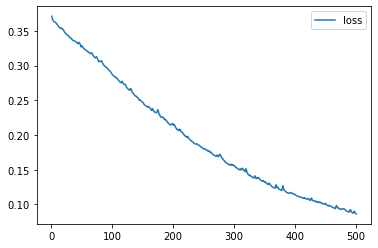

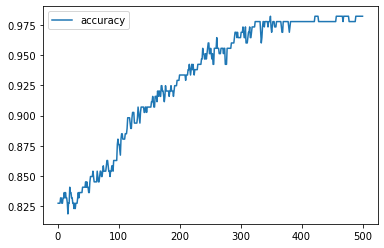

In [46]:
# Create a DataFrame with the history dictionary
model_history = pd.DataFrame(nfl_nn_model.history, index=range(1, len(nfl_nn_model.history["loss"]) + 1))

# Plot the loss
model_history.plot(y="loss")

# Plot the accuracy
model_history.plot(y="accuracy")

In [49]:
# Evaluate the model using testing data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.0532 - accuracy: 1.0000 - 109ms/epoch - 109ms/step
Loss: 0.05323205888271332, Accuracy: 1.0
